# Kaggle API

In [2]:
#!pip install kaggle

In [3]:
#!rm -r /root/.kaggle

In [4]:
#! mkdir ~/.kaggle

In [5]:
#! cp kaggle.json ~/.kaggle

In [6]:
#! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#! kaggle datasets download -d jangedoo/utkface-new

In [8]:
#! unzip utkface-new.zip

# GPU

In [1]:
import tensorflow as tf

In [2]:
device_list = tf.test.gpu_device_name()

device_list

''

In [3]:
!nvidia-smi

Tue May  9 16:49:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:06:00.0  On |                  N/A |
| 28%   41C    P0    17W / 100W |    705MiB /  4096MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Packages

In [116]:
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import math
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Functions

In [117]:
def display(img):
    plt.imshow(img)
    plt.show()
    
    
def metrics_gender(X, y): 
    y_pred = clf.predict(X)

    mcc = matthews_corrcoef(y, y_pred)
   
    print("MCC: ", mcc)
    
    print(classification_report(y_test, y_pred))

    labelGender = list(set(y_genders))

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    
def metrics_age(X, y):

    y_pred = clf.predict(X)

 
    mcc = matthews_corrcoef(y, y_pred)

    print("MCC: ", mcc)

    print(classification_report(y, y_pred))

    labelage= list(set(y_age_classes))

    cm = confusion_matrix(y, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
    # set plot labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
     

# Load Balanced Data

## Age Classes

In [ ]:
#age_classes_vars = np.load('../../../data_project/new_data/age_classes_vars.npz')
age_classes_vars = np.load('/content/drive/MyDrive/new_data/content/new_data/age_calsses_vars.npz')

X_age_classes = age_classes_vars['x']
y_age_classes = age_classes_vars['y']

print(X_age_classes.shape)
print(len(y_age_classes))

(3480, 200, 200, 3)
3480


## Genders

In [ ]:
gender_vars = np.load('/content/drive/MyDrive/new_data/content/new_data/age_calsses_vars.npz')
#gender_vars = np.load('../../../data_project/new_data/gender_vars.npz')

X_genders = gender_vars['x']
y_genders = gender_vars['y']

print(X_genders.shape)
print(len(y_genders))

(20000, 200, 200, 3)
20000


# Models

## BASE

### Gender

In [119]:
flattened_images_genders = []

for image in X_genders:
    flattened_image = image.flatten()
    flattened_images_genders.append(flattened_image)

flattened_images_genders = np.array(flattened_images_genders)

In [120]:
perm = np.random.permutation(len(flattened_images_genders))
reduced_X_genders = flattened_images_genders[perm]
reduced_y_genders = y_genders[perm]

#use only a portion of the shuffled arrays for the train-test split
reduced_X_genders = reduced_X_genders[:10000]
reduced_y_genders = reduced_y_genders[:10000]

MCC:  0.29012942659282975
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.36      0.80      0.50         5

    accuracy                           0.60        20
   macro avg       0.63      0.67      0.58        20
weighted avg       0.76      0.60      0.63        20



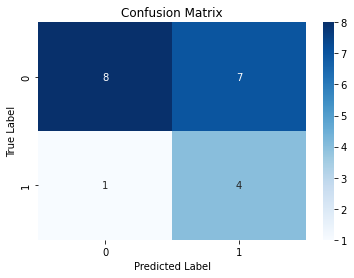

In [121]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X_genders, reduced_y_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)


metrics_gender(X_test, y_test)

### Age

In [ ]:
flattened_images_age_classes = []

for image in X_age_classes:
    flattened_image = image.flatten()
    flattened_images_age_classes.append(flattened_image)

flattened_images_age_classes = np.array(flattened_images_age_classes)

MCC:  0.09166199015381171
              precision    recall  f1-score   support

           0       0.11      1.00      0.20         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3

    accuracy                           0.15        20
   macro avg       0.10      0.20      0.08        20
weighted avg       0.14      0.15      0.09        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


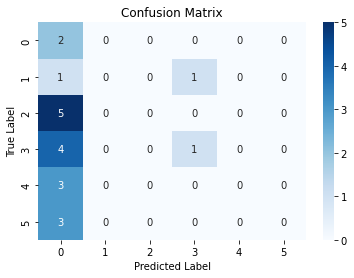

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flattened_images_age_classes, age_categories, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## HOG

### Gender

In [ ]:
perm = np.random.permutation(len(X_genders))
X_genders = X_genders[perm]
y_genders = y_genders[perm]

#use only a portion of the shuffled arrays for the train-test split
X_genders = X_genders[:10000]
y_genders = y_genders[:10000]

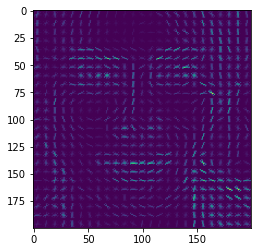

In [122]:
image_check = X_genders[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)

# display HOG features
plt.imshow(hog_image)
plt.show()

In [123]:
# Extract HOG features from the images
hog_features = []
for img in X_genders:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

MCC:  0.0
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


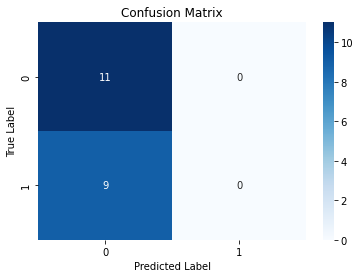

In [125]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

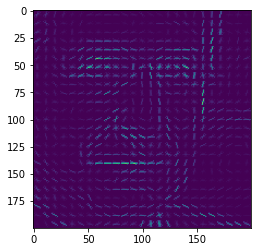

In [ ]:
image_check = X_age_classes[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)


# display HOG features
plt.imshow(hog_image)
plt.show()

In [ ]:
# Extract HOG features from the images
hog_features = []
for img in X_age_classes:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

MCC:  0.09560185579894931
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2
           2       0.50      0.40      0.44         5
           3       0.00      0.00      0.00         5
           4       0.22      0.67      0.33         3
           5       0.00      0.00      0.00         3

    accuracy                           0.25        20
   macro avg       0.18      0.26      0.20        20
weighted avg       0.19      0.25      0.20        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


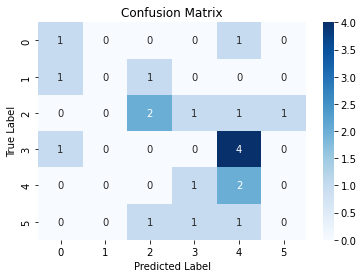

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y_age_classes, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## ORB

### Gender

In [128]:
orb_X_genders = []
for img in X_genders:
    img = img * 255.0
    orb_X_genders.append(img)

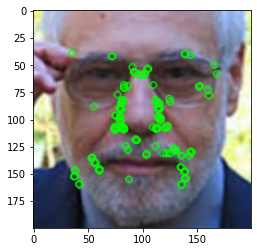

In [129]:
image_check = orb_X_genders[1]
image_check = cv2.convertScaleAbs(image_check)
orb_X_genders = [cv2.convertScaleAbs(img) for img in orb_X_genders]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [130]:
orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_genders = []

# loop over images and keypoints
for i, img in enumerate(orb_X_genders):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_genders.append(y_genders[i])
    

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

MCC:  0.0
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


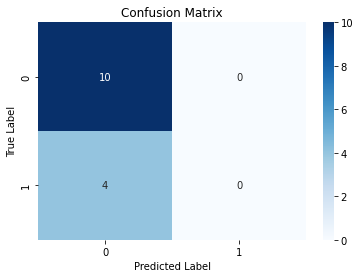

In [131]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

In [ ]:
orb_X_age_classes = []
for img in X_age_classes:
    img = img * 255.0
    orb_X_age_classes.append(img)

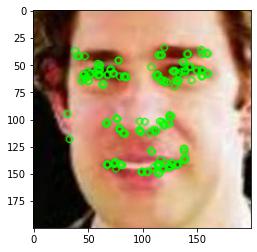

In [ ]:
image_check = orb_X_age_classes[1]
image_check = cv2.convertScaleAbs(image_check)
orb_X_age_classes = [cv2.convertScaleAbs(img) for img in orb_X_age_classes]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [ ]:
orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_ages = []

# loop over images and keypoints
for i, img in enumerate(orb_X_age_classes):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_ages.append(y_age_classes[i])

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

MCC:  0.17237710541432064
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3

    accuracy                           0.25        12
   macro avg       0.22      0.28      0.22        12
weighted avg       0.28      0.25      0.24        12



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


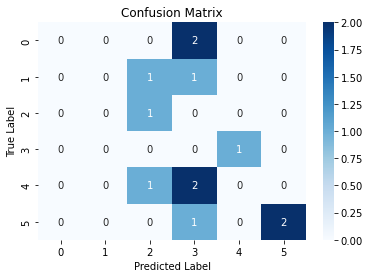

In [ ]:
##### AGE
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_ages, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## VGG 16

### Gender

In [132]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

X = np.stack(X_genders)
X = VGG_model.predict(X)
X_svm = X.reshape(X.shape[0], -1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

MCC:  0.0
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


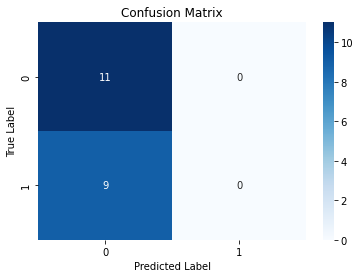

In [133]:
##### Gender
X_svm = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

In [134]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

X = np.stack(X_age_classes)
X = VGG_model.predict(X)
X_svm = X.reshape(X.shape[0], -1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

MCC:  0.2943981558540647
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         2
           2       1.00      0.40      0.57         5
           3       0.33      0.20      0.25         5
           4       0.29      0.67      0.40         3
           5       0.40      0.67      0.50         3

    accuracy                           0.40        20
   macro avg       0.42      0.41      0.37        20
weighted avg       0.49      0.40      0.39        20



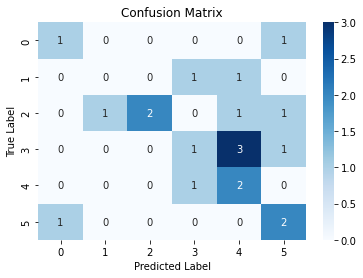

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_age_classes, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## Autoencoder

### Gender

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_genders, y_genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [136]:
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_3 (Dense)             (None, 10000)             2001

In [137]:
autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 20,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 0.6930 - val_loss: 0.6928
Epoch 2/20
3/3 [==============================] - 3s 879ms/step - loss: 0.6925 - val_loss: 0.6923
Epoch 3/20
3/3 [==============================] - 3s 853ms/step - loss: 0.6918 - val_loss: 0.6911
Epoch 4/20
3/3 [==============================] - 3s 851ms/step - loss: 0.6894 - val_loss: 0.6861
Epoch 5/20
3/3 [==============================] - 3s 882ms/step - loss: 0.6844 - val_loss: 0.6842
Epoch 6/20
3/3 [==============================] - 3s 924ms/step - loss: 0.6822 - val_loss: 0.6841
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.6808 - val_loss: 0.6861
Epoch 8/20
3/3 [==============================] - 3s 868ms/step - loss: 0.6796 - val_loss: 0.6819
Epoch 9/20
3/3 [==============================] - 3s 836ms/step - loss: 0.6775 - val_loss: 0.6805
Epoch 10/20
3/3 [==============================] - 2s 815ms/step - loss: 0.6755 - val_loss: 0.6827
Epoch 11/20
3/3 [========

In [138]:
new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)

encoded_X_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_X_test = pred_test.reshape((pred_test.shape[0], -1))

1/1 [==============================] - 0s 56ms/step


MCC:  0.5044296328024895
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.83      0.56      0.67         9

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20



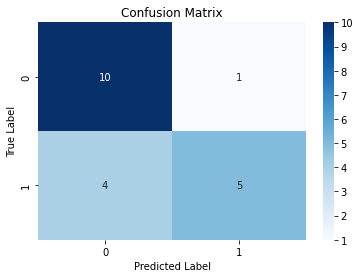

In [139]:
clf = SVC()
clf.fit(encoded_X_train, y_train)

metrics_gender(encoded_X_test, y_test)

### Age

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_age_classes, y_age_classes, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [ ]:
# binary cross entropy is good for imagprint("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

autoencoder.summary()#e feature extraction especially when images are normalized

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 2000)              20002000  
                                                                 
 dense_1 (Dense)             (None, 10000)             200100

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs = 20,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/20
3/3 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.6685 - val_loss: 0.6927 - val_accuracy: 0.9358
Epoch 2/20
3/3 [==============================] - 2s 821ms/step - loss: 0.6926 - accuracy: 0.9237 - val_loss: 0.6921 - val_accuracy: 0.9313
Epoch 3/20
3/3 [==============================] - 2s 811ms/step - loss: 0.6918 - accuracy: 0.9057 - val_loss: 0.6901 - val_accuracy: 0.8616
Epoch 4/20
3/3 [==============================] - 3s 813ms/step - loss: 0.6885 - accuracy: 0.8103 - val_loss: 0.6865 - val_accuracy: 0.8026
Epoch 5/20
3/3 [==============================] - 2s 810ms/step - loss: 0.6844 - accuracy: 0.8139 - val_loss: 0.6831 - val_accuracy: 0.8868
Epoch 6/20
3/3 [==============================] - 3s 825ms/step - loss: 0.6793 - accuracy: 0.8791 - val_loss: 0.6830 - val_accuracy: 0.9071
Epoch 7/20
3/3 [==============================] - 3s 826ms/step - loss: 0.6758 - accuracy: 0.9032 - val_loss: 0.6804 - val_accuracy: 0.9324
Epoch 8/20
3/3 [=======

In [ ]:
new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)


encoded_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_test = pred_test.reshape((pred_test.shape[0], -1))

1/1 [==============================] - 0s 65ms/step


MCC:  0.0434726691698611
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.43      0.60      0.50         5
           3       0.25      0.40      0.31         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3

    accuracy                           0.25        20
   macro avg       0.11      0.17      0.13        20
weighted avg       0.17      0.25      0.20        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


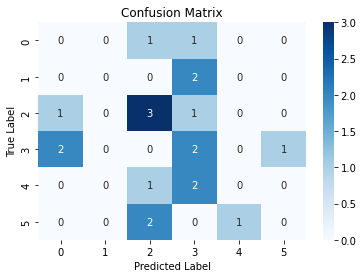

In [ ]:
clf = OneVsRestClassifier(SVC())
clf.fit(encoded_train, y_train)


metrics_age(encoded_test, y_test) 

## Improved SVM for Gender

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_genders, y_genders, test_size=0.2, random_state=42)#variar a percentagem split

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
X_train_stacked = np.stack(X_train)

feature_extractor=VGG_model.predict(X_train_stacked)

features_vgg16 = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
clf = SVC()
clf.fit(features_vgg16, y_train)

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 10, 100], 
              'gamma': [0.1,  0.001, 0.0001]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = False)
  
# fitting the model for grid search
grid.fit(features_vgg16, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
metrics_gender(X_test, y_test, y_genders)